importing Jupyter notebook from NLP.ipynb
importing Jupyter notebook from ML_trial.ipynb
importing Jupyter notebook from EDA.ipynb
KNN: 0.646700204638472 , RandomForest: 0.7068980218281037 , LogisticRegression 0.7068980218281037


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<string>:2: FutureWarning: The default value of regex will change from True to False in a future version.


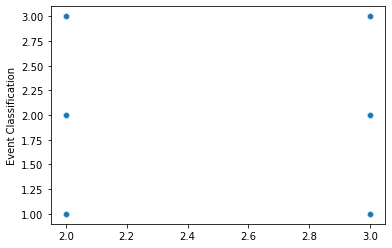

In [1]:
import import_ipynb
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.model_selection import validation_curve
import NLP, ML_trial, EDA#1

In [2]:
X = NLP.X
y = EDA.new_df['Event Classification']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<AxesSubplot:ylabel='Event Classification'>

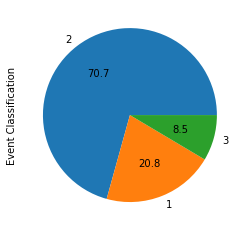

In [4]:
y.value_counts().plot.pie(autopct='%.1f')

### Balancing the data

In [5]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [6]:
#over sample minority class and under sample majority class with smote 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
oversample = SMOTE()
undersample = RandomUnderSampler()
s = [("o", oversample),("u", undersample)]
pipeline = Pipeline(steps=s)
X_train_bal,y_train_bal = pipeline.fit_resample(X_train, y_train)

In [7]:
c = Counter(y_train)
for k,v in c.items():
    dist = v/len(y)*100
    print(f"class={k},n={v} ({dist}%)")

class=1,n=11464 (14.66284661823391%)
class=2,n=38633 (49.41292336027831%)
class=3,n=4631 (5.9232067942289985%)


<AxesSubplot:ylabel='Event Classification'>

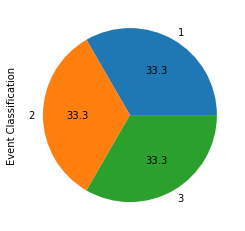

In [8]:
y_train_bal.value_counts().plot.pie(autopct='%.1f')

#### ML with balanced data

In [9]:
knn, rf, lor, kfold = KNeighborsClassifier(), RandomForestClassifier(), LogisticRegression(max_iter=30000), KFold(3)

In [10]:
rf.fit(X_train_bal,y_train_bal)
knn.fit(X_train_bal,y_train_bal)
lor.fit(X_train_bal,y_train_bal)

LogisticRegression(max_iter=30000)

Five most important features according to RandomForestClassifier

In [11]:
imp_feat = rf.feature_importances_.argsort()[-5:]
[NLP.vect_df.columns[i] for i in imp_feat]

['separately', 'cisatracurium', 'roxy', 'explor', 'ss']

In [12]:
#prediction for test
knn_yhat = knn.predict(X_test)
rf_yhat = rf.predict(X_test)
lor_yhat = lor.predict(X_test)

In [13]:
#accuracy before hyperparameter tuning 
print('KNN:',accuracy_score(y_test,knn_yhat), 'RandomForest',accuracy_score(y_test, rf_yhat), 'Logistic Regression',accuracy_score(y_test, lor_yhat))

KNN: 0.7651347203274216 RandomForest 0.8989171214188267 Logistic Regression 0.8572646657571623


#### ML with original data split

In [14]:
rf.fit(X_train,y_train)
knn.fit(X_train,y_train)
lor.fit(X_train,y_train)

LogisticRegression(max_iter=30000)

Five most important features according to RandomForestClassifier

In [15]:
imp_feat = rf.feature_importances_.argsort()[-5:]
[NLP.vect_df.columns[i] for i in imp_feat]

['robotic', 'separately', 'roxy', 'ss', 'explor']

In [17]:
knn_yhat = knn.predict(X_test)
rf_yhat = rf.predict(X_test)
lor_yhat = lor.predict(X_test)

In [18]:
#accuracy before hyperparameter tuning 
print('KNN:',accuracy_score(y_test,knn_yhat), 'RandomForest',accuracy_score(y_test, rf_yhat), 'Logistic Regression',accuracy_score(y_test, lor_yhat))

KNN: 0.8993860845839018 RandomForest 0.933705661664393 Logistic Regression 0.9095753751705321
